# Train a Perceptron!

## Introduction

Ok, finally we'll actually train a machine learning system!!

The goal is to separata data like this

```python
def generate_data(N):
    s1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]], size = N)
    s2 = np.random.multivariate_normal([-1.5,-1.5],[[1,0.2],[0.2,1.0]], size = N)
    X = np.concatenate([s1,s2])
    z = np.concatenate([np.ones(N),np.zeros(N)])
    return X,z

X,z = generate_data(200)
plt.scatter(X[:,0],X[:,1],c = z)
```

<img src="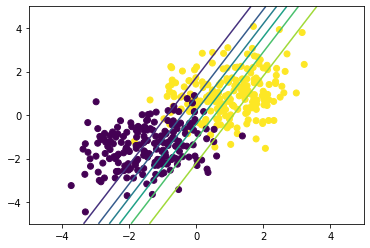&#10;">

## Setting up Variational Inference

We assume the data is produced from a conditional model $p(x|z)$ and we want to find the posterior $p(z|x)$. As an approximation we use the parametrized density 

$$
q(z|\theta) = \mathrm{Bernoulli(z|\theta}) = \begin{cases}\theta\;\mathrm{for}\;z = 1\\1-\theta\;\mathrm{for}\;z = 0\end{cases}
$$

Following the "amortized variational inference" approach, we assume that we can approximate $p(z|x)$ by learning a data-dependent function $\theta(x)$.


The plan is to train a "soft" percepton as discussed in the lecture

$$
\theta_{\vec{w},b}(x) = \sigma(w \cdot x + b)
$$

such that $p(z|x) \approx q(z|x) = \mathrm{Bernoulli(z|\theta(x)})$

We will break this down into three function and combine all parameters into a single parameter vector

$$
\phi = (w_1,w_2,b)
$$

1. First the linear mapping: $h(x) = \vec{w} x + b$ mapping $h: \mathbb{R}^2 \to \mathbb{R}$
   ```python
   def linear(x,parameters):
       out = x @ parameters[:2].T + parameters[2]
       return out
   ```

2. Second, the squashing function $\sigma: \mathbb{R} \to [0,1]$
   ```python
   def sigmoid(x):
       out = 1/(1+np.exp(-x))
       return out
   ```

2. Third, the loss function $l(z,\theta) = -\log q(z_i|\theta)$
   ```python
   def loss(z, theta):
       out = np.where(z==1,-np.log(theta),-np.log(1-theta))
       return out
   ```

In order to estimate the loss for the full dataset, we need to compute the empirical risk $\hat{L} = -\sum_{z_i,x_i} \log(z_i | \theta(x_i))$

```python
def empirical_risk(X,z,pars):
    mapped = linear(X,pars)
    theta = sigmoid(mapped)
    loss_val = loss(z,theta)
    return loss_val.mean(axis=0)
```

We can can plot the decision function $\theta(x)$ on the plance $(x_1,x_1) \in \mathbb{R}^2$ using a function like this

```python
def plot(X,z,pars):
    grid = np.mgrid[-5:5:101j,-5:5:101j]
    Xi = np.swapaxes(grid,0,-1).reshape(-1,2)   
    p = sigmoid(linear(X,pars))
    zi = sigmoid(linear(Xi,pars))
    zi = zi.reshape(101,101).T
    plt.contour(grid[0],grid[1],zi)
    plt.scatter(X[:,0],X[:,1],c = z)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
```


### Step 1 Plot a fixed Percepton

Use the above functions to plot the percepton and the data for a fixed parameter vector $\phi = (2.0,-1.0,0.0)$


## Gradient Calculation

In order to train the perceptron we need to have the empirical risk value and its derivative

$$\hat{L}, \frac{\partial \hat{L}}{\partial \phi}$$

Using the definitions we get 

$$
\frac{\partial \hat{L}}{\partial \phi} = \sum_i \frac{\partial}{\partial \phi}l(z_i,\sigma(h(x))
$$


That is, if we just need to find an expression for $\frac{\partial}{\partial \phi}l(z_i,\sigma(h(x))$. By the chain rule

$$
\frac{\partial}{\partial \phi}l(z_i,\sigma(h(x)) = \frac{\partial l}{\partial \sigma} \frac{\partial \sigma}{\partial h}  \frac{\partial h}{\partial \phi}
$$


### Step 2

Derive an expression for the the derivative $\frac{\partial h}{\partial \phi}$


### Step 3

Show that the derivative of $\sigma(x)$ corresponds to 

$$
\sigma'(x) = \sigma(x)(1-\sigma(x))
$$

### Step 4

Derive the derivative of $\frac{\partial l(z,\theta)}{\partial \theta}$ for both $z=0$ and $z=1$


### Step 5

Adapt the functions `linear(..)`, `sigmoid(...)`, `loss(...)` such that they return

1. The function value
2. The gradient value at the point at which the function was evaluated

```
def function(...)
    out = ...
    grad = ...
    return out,grad
```

Hint: as we will evluate the function on many inputs at the same time make sure to return a "column" vector of shape (N,1) for the sigmoid and loss functions


### Step 6

Using the chain rule and the individual gradient computations, adapt `empirical_risk` similarly to return 

1. $\hat{L}$
2. $\frac{\partial \hat{L}}{\partial \phi}$


### Step 7

Write a Training Loop!

1. Initialize the parameters with $\phi = (1.0,0.0,0.0)$
2. Allow 2000 iterations of improving the parameters
3. For each iteration update the parameters with Gradient Descent and a Learning Rate of $\lambda=0.01$

$$ \phi \leftarrow = \phi - \lambda \frac{\partial \hat{L}}{\partial \phi}$$

4. After every 500 steps, plot the current configuration using `plot(...)` (Note: now that the functions return multiple return values, the `plot` function needs to be adapted a bit

### Step 8

Congratulations, you wrote your first full ML loop!. You can now play with the details of `generate_data` to try out a few data configurations and convince yourself that your algorithm will find a good decision boundary every time.


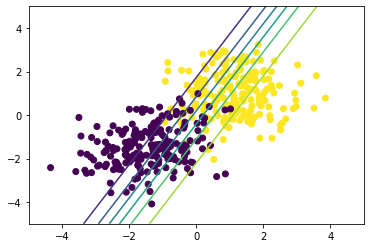

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def generate_data(N):
    s1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]], size = N)
    s2 = np.random.multivariate_normal([-1.5,-1.5],[[1,0.2],[0.2,1.0]], size = N)
    X = np.concatenate([s1,s2])
    z = np.concatenate([np.ones(N),np.zeros(N)])
    return X,z

def linear(x,parameters):
    out = x @ parameters[:2].T + parameters[2]
    return out

def sigmoid(x):
    out = 1/(1+np.exp(-x))
    return out

def loss(z, theta):
    out = np.where(z==1,-np.log(theta),-np.log(1-theta))
    return out

def plot(X,z,pars):
    grid = np.mgrid[-5:5:101j,-5:5:101j]
    Xi = np.swapaxes(grid,0,-1).reshape(-1,2)   
    p = sigmoid(linear(X,pars))
    zi = sigmoid(linear(Xi,pars))
    zi = zi.reshape(101,101).T
    plt.contour(grid[0],grid[1],zi)
    plt.scatter(X[:,0],X[:,1],c = z)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    

X,z = generate_data(200)
plot(X,z,np.array([2.0,-1.0,0.0]))

0.33785518927363273


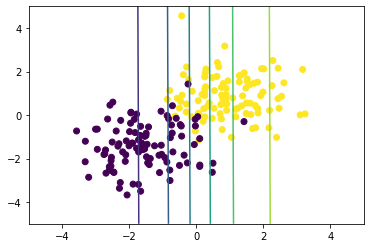

0.1822329725369138


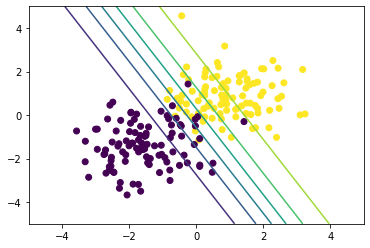

0.1530355345279407


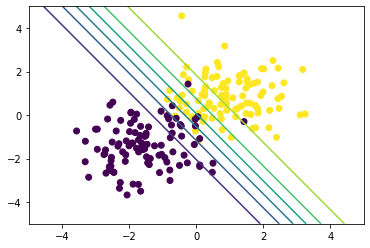

0.1404626659560595


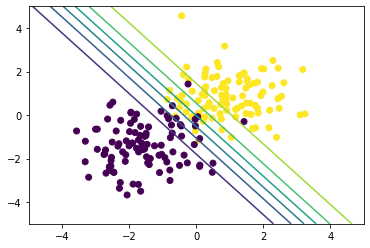

[1.77127662 1.35238215 0.5195668 ]


In [5]:
def linear(X,pars):
    out = X @ pars[:2].T + pars[2]
    grad = np.column_stack([X,np.ones(len(X))])
    return out,grad

def sigmoid(x):
    out = 1/(1+np.exp(-x))
    grad = out*(1-out)
    return out,grad.reshape(-1,1)

def loss(z,theta):
    out = np.where(z==1,-np.log(theta),-np.log(1-theta))
    grad = np.where(z==1,-1/theta,-1/(1-theta)*(-1))
    return out,grad.reshape(-1,1)

def empirical_risk(X,z,pars):
    mapped,g3 = linear(X,pars)
    theta,g2 = sigmoid(mapped)
    loss_val,g1 = loss(z,theta)
    grad = g1*g2*g3
    return loss_val.mean(axis=0),grad.mean(axis=0)

def plot(X,z,pars):
    grid = np.mgrid[-5:5:101j,-5:5:101j]
    Xi = np.swapaxes(grid,0,-1).reshape(-1,2)   
    p = sigmoid(linear(X,pars)[0])[0]
    zi = sigmoid(linear(Xi,pars)[0])[0]
    zi = zi.reshape(101,101).T
    plt.contour(grid[0],grid[1],zi)
    plt.scatter(X[:,0],X[:,1],c = z)
    plt.xlim(-5,5)
    plt.ylim(-5,5)

def generate_data(N):
    s1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]], size = N)
    s2 = np.random.multivariate_normal([-1.5,-1.5],[[1,0.2],[0.2,1.0]], size = N)
    X = np.concatenate([s1,s2])
    z = np.concatenate([np.ones(N),np.zeros(N)])
    return X,z

def learn(data):
    X,y = data
    pars = np.array([1.0,0.0,0.0])    
    for i in range(2000):
        val,grad = empirical_risk(X,y,pars)
        pars = pars - 0.01*grad
        if i % 500 == 0:
            print(val)
            plot(X,y,pars)
            plt.savefig(f'{str(i).zfill(8)}_train.png')
            plt.show()
    return pars
pars = learn(generate_data(100))            
print(pars)